<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM2/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [35]:
df = pd.read_csv("/content/drive/MyDrive/ipynb/sem2/datasets/prog1.csv")
df

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
502,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8
503,6.28807,0.0,18.10,0,0.740,6.341,96.4,2.0720,24,666,20.2,318.01,17.79,14.9
504,9.92485,0.0,18.10,0,0.740,6.251,96.6,2.1980,24,666,20.2,388.52,16.44,12.6


In [36]:
df.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [37]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

No missing values!!!

In [38]:
mean_value = df['MValue'].mean()

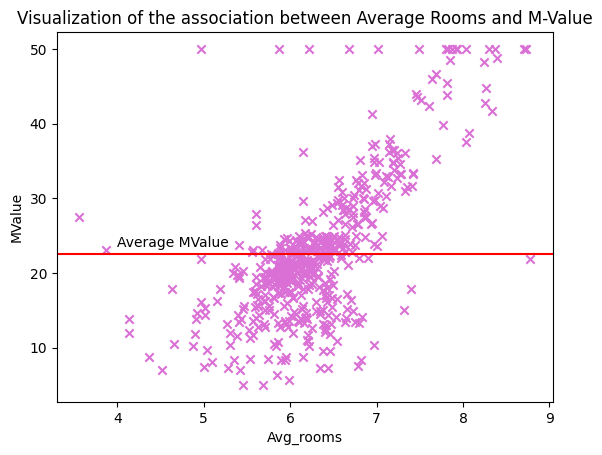

In [39]:
pt.scatter(df.iloc[:,5],df.iloc[:,-1],color='orchid',marker='x')
pt.axhline(y=mean_value,color='red')
pt.annotate("Average MValue", xy=(4, mean_value+1))
pt.xlabel("Avg_rooms")
pt.ylabel("MValue")
pt.title("Visualization of the association between Average Rooms and M-Value")
pt.show()

In [40]:
x=df.iloc[:,5]
y=df.iloc[:,-1]

In [41]:
n=len(x)
split = int(0.7 * n)
x_train, x_test =x[:split], x[split:]
y_train, y_test =y[:split], y[split:]

In [42]:
xy=x_train*y_train
n=len(x_train)
xmean=x_train.mean()
ymean=y_train.mean()
numerator=xy.sum()-n*xmean*ymean
denominator=(x_train**2).sum()-n*(xmean**2)
m=numerator/denominator
c=ymean - (m*xmean)
print('Intercept:',c,'Coefficient:',m)

Intercept: -33.07539575494117 Coefficient: 9.017518302547172


In [43]:
x_train = np.array(x_train).reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Intercept:',model.intercept_, 'Coefficient:',model.coef_)

Intercept: -33.07539575494124 Coefficient: [9.0175183]


In [44]:
df1 = df.iloc[:354,:]
df1

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
350,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
351,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
352,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6


In [45]:
trained_model = c + m*df.iloc[:354,5]
df1['Pred_MValue'] = trained_model
df1[['Avg_rooms','MValue','Pred_MValue']]

,Avg_rooms,MValue,Pred_MValue
0,7.416,33.2,33.798520
1,6.727,27.5,27.585450
2,6.781,26.5,28.072396
3,6.405,18.6,24.681809
4,6.137,19.3,22.265114
...,...,...,...
349,5.569,17.5,17.143164
350,6.027,16.8,21.273187
351,6.593,22.4,26.377102
352,6.120,20.6,22.111816


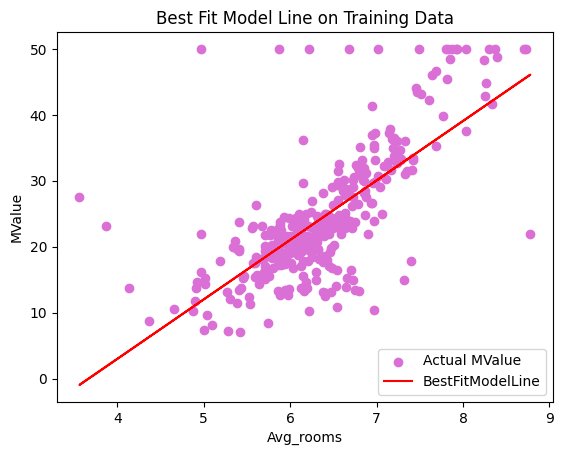

In [46]:
fig, ax = pt.subplots()
ax.scatter(x='Avg_rooms',y='MValue',data=df1,label='Actual MValue', color='orchid')
ax.plot(df1['Avg_rooms'],df1['Pred_MValue'],color='red',label='BestFitModelLine')
ax.set_ylabel('MValue')
ax.set_xlabel('Avg_rooms')
ax.set_title('Best Fit Model Line on Training Data')
ax.legend()
pt.show()

In [47]:
df2 = pd.DataFrame({'Avg_rooms':df1['Avg_rooms'],
                    'MValue':df1['MValue'],
                    'Pred_MValue':df1['Pred_MValue'],
                    'Error':(df1.Pred_MValue-df1.MValue)})
df2

,Avg_rooms,MValue,Pred_MValue,Error
0,7.416,33.2,33.798520,0.598520
1,6.727,27.5,27.585450,0.085450
2,6.781,26.5,28.072396,1.572396
3,6.405,18.6,24.681809,6.081809
4,6.137,19.3,22.265114,2.965114
...,...,...,...,...
349,5.569,17.5,17.143164,-0.356836
350,6.027,16.8,21.273187,4.473187
351,6.593,22.4,26.377102,3.977102
352,6.120,20.6,22.111816,1.511816


Mean Squared Error on training data

In [48]:
MSEtr = sum(df2['Error']**2)/354
MSEtr

43.32646670368637

Total Sum of Squares

In [49]:
SST = sum((df2.MValue - df2.MValue.mean())**2)
SST

31940.532796610172

Sum of Squared Error

In [50]:
SSE = sum(df2.Error**2)
SSE

15337.569213104975

Sum of Squared Regression

In [51]:
SSR = SST - SSE
SSR

16602.963583505196

$R^2$ on training data (manual)

In [52]:
Rsq = SSR/SST
Rsq

0.5198085983483425

$R^2$ using model.score

In [53]:
RsqA = model.score(df2[['Avg_rooms']],df2['MValue'])
RsqA

0.5198085983483426

In [54]:
df3 = df.iloc[354:507,:]
df3

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
354,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
355,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9
356,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
357,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
358,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
502,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8
503,6.28807,0.0,18.10,0,0.740,6.341,96.4,2.0720,24,666,20.2,318.01,17.79,14.9
504,9.92485,0.0,18.10,0,0.740,6.251,96.6,2.1980,24,666,20.2,388.52,16.44,12.6


In [55]:
test_model = c + m*df.iloc[354:507,5]
df3['Pred_MValue'] = test_model
df3[['Avg_rooms','MValue','Pred_MValue']]

,Avg_rooms,MValue,Pred_MValue
354,6.794,22.0,28.189624
355,6.030,11.9,21.300240
356,5.453,5.0,16.097132
357,6.575,24.0,26.214787
358,6.421,21.6,24.826089
...,...,...,...
501,5.854,10.8,19.713156
502,6.459,11.8,25.168755
503,6.341,14.9,24.104688
504,6.251,12.6,23.293111


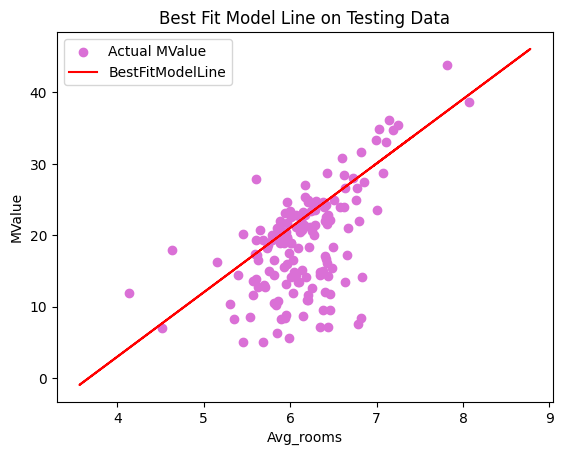

In [56]:
fig, ax = pt.subplots()
ax.scatter(x='Avg_rooms',y='MValue',data=df3,label='Actual MValue', color='orchid')
ax.plot(df1['Avg_rooms'],df1['Pred_MValue'],color='red',label='BestFitModelLine')
ax.set_ylabel('MValue')
ax.set_xlabel('Avg_rooms')
ax.set_title('Best Fit Model Line on Testing Data')
ax.legend()
pt.show()

In [57]:
df4 = pd.DataFrame({'Avg_rooms':df3['Avg_rooms'],
                    'MValue':df3['MValue'],
                    'Pred_MValue':df3['Pred_MValue'],
                    'Error':(df3.Pred_MValue-df3.MValue)})
df4

,Avg_rooms,MValue,Pred_MValue,Error
354,6.794,22.0,28.189624,6.189624
355,6.030,11.9,21.300240,9.400240
356,5.453,5.0,16.097132,11.097132
357,6.575,24.0,26.214787,2.214787
358,6.421,21.6,24.826089,3.226089
...,...,...,...,...
501,5.854,10.8,19.713156,8.913156
502,6.459,11.8,25.168755,13.368755
503,6.341,14.9,24.104688,9.204688
504,6.251,12.6,23.293111,10.693111


In [58]:
MSEte = sum(df4['Error']**2)/152
MSEte

48.016497699290255

In [59]:
SST = sum((df4.MValue - df4.MValue.mean())**2)
SST

7834.23835526316

In [60]:
SSE = sum(df4.Error**2)
SSE

7298.507650292118

In [61]:
SSR = SST - SSE
SSR

535.7307049710416

In [62]:
Rsq = SSR/SST
Rsq

0.06838325318646064

In [63]:
RsqA = model.score(df4[['Avg_rooms']],df4['MValue'])
RsqA

0.06838325318645944

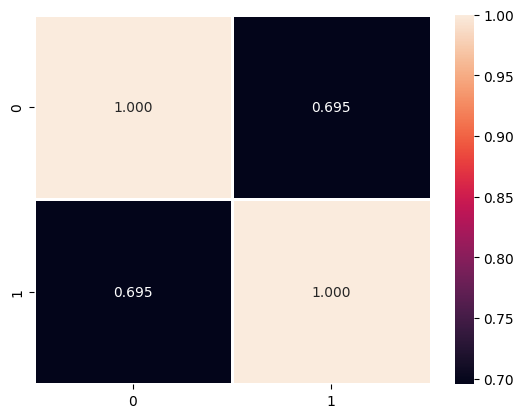

In [64]:
sb.heatmap(np.corrcoef(df['Avg_rooms'],df['MValue']), annot=True, fmt='.3f', linewidths=2);

INFERENCE:

The logistic regression model we built exhibits mixed performance based on a set of evaluation metrics. On the training data, the model demonstrates a reasonable fit with a Mean Squared Error (MSE) of 43.33 and a Sum of Squared Error (SSE) of 15337.57. The R-squared value of 0.52 suggests that the model explains approximately 52% of the variance in the training set. These metrics indicate a satisfactory level of predictive accuracy on the data used for training.

However, the model's generalization to new, unseen data, as assessed on the testing set, is less robust. The Mean Squared Error on testing data increases to 48.02, and the R-squared value drops significantly to 0.07. This suggests that the model struggles to capture the underlying patterns in the testing set, explaining only 7% of the variance. The higher testing MSE and lower R-squared signal potential issues with overfitting or a lack of generalizability.

To enhance the model's performance on unseen data, we can explore strategies such as feature engineering, regularization techniques, or hyperparameter tuning. Additionally, a deeper investigation into the nature of the data and potential sources of overfitting may uncover insights for model refinement. Understanding the specific context and implications of the model's predictions in real-world scenarios is crucial for determining the practical utility of the logistic regression model.